**From File Upload**

In [2]:
# import Python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# regression package
import statsmodels.api as sm

# sentiment analysis packages
import re
import nltk
#nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
#nltk.download('stopwords')
from nltk.corpus import stopwords
#nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
# from textblob import TextBlob

# topic modeling packages
import gensim
from gensim import corpora

/Users/nguyenann/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/nguyenann/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
#importing data in jupyter notebook
# import pandas as pd
# import numpy as np
# data_biden_20=pd.read_csv("Scraped Data/biden_20_geotagged.csv")
# data_biden_20["GeoLocation"]=data_biden_20["GeoLocation"].str.strip()
# data_biden_20

### Trump_20

In [3]:
#importing data
import pandas as pd
import numpy as np
trump_20=pd.read_csv("trump_20_geotagged.csv", index_col=0)
trump_20["GeoLocation"]=trump_20["GeoLocation"].str.strip()
trump_20

,Username,Datetime,Content,Likes,GeoLocation,ProfileLocation
0,_bad_ashh,2020-11-02 18:08:05+00:00,@rachelnsilver Especially considering Eminem i...,1,"Hancock, OH","Columbus, OH"
1,_bad_ashh,2020-11-02 14:50:13+00:00,So 50 Cent is a Trump supporter AND made fun o...,3,"Hancock, OH","Columbus, OH"
2,MWMMediaStudio,2020-10-25 19:30:21+00:00,@atronic @haupt1991 @crzyk9chick @NYScanner @r...,1,"Hancock, OH",Traveling the US in a Semi
3,8Crawdaddy3,2020-10-23 02:31:06+00:00,@TJLang70 Should be on Trump’s website within ...,0,"Hancock, OH","Ohio, USA"
4,PatHowley,2020-10-14 01:15:14+00:00,If you don’t think Donald Trump has paid for a...,4,"Hancock, OH","Cleveland, OH"
...,...,...,...,...,...,...
42784,DiannRu69542642,2020-10-02 12:16:23+00:00,All of my prayers go to President Trump and fi...,0,"St. Charles, LA","St Rose, LA"
42785,qckwitted1,2020-10-02 07:22:33+00:00,"""President Trump says he and First Lady Melani...",0,"St. Charles, LA","Mississippi, USA by way of NY"
42786,qckwitted1,2020-10-02 07:20:16+00:00,President Donald Trump and first lady Melania ...,0,"St. Charles, LA","Mississippi, USA by way of NY"
42787,Ceaux_,2020-10-02 05:06:30+00:00,Trump has covid.... I would like to have a tal...,0,"St. Charles, LA","Louisiana, USA"


In [4]:
trump_20['Datetime']=trump_20['Datetime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S%z'))
trump_20['Date'] = trump_20['Datetime'].apply(lambda x: x.date())
trump_20

,Username,Datetime,Content,Likes,GeoLocation,ProfileLocation,Date
0,_bad_ashh,2020-11-02 18:08:05+00:00,@rachelnsilver Especially considering Eminem i...,1,"Hancock, OH","Columbus, OH",2020-11-02
1,_bad_ashh,2020-11-02 14:50:13+00:00,So 50 Cent is a Trump supporter AND made fun o...,3,"Hancock, OH","Columbus, OH",2020-11-02
2,MWMMediaStudio,2020-10-25 19:30:21+00:00,@atronic @haupt1991 @crzyk9chick @NYScanner @r...,1,"Hancock, OH",Traveling the US in a Semi,2020-10-25
3,8Crawdaddy3,2020-10-23 02:31:06+00:00,@TJLang70 Should be on Trump’s website within ...,0,"Hancock, OH","Ohio, USA",2020-10-23
4,PatHowley,2020-10-14 01:15:14+00:00,If you don’t think Donald Trump has paid for a...,4,"Hancock, OH","Cleveland, OH",2020-10-14
...,...,...,...,...,...,...,...
42784,DiannRu69542642,2020-10-02 12:16:23+00:00,All of my prayers go to President Trump and fi...,0,"St. Charles, LA","St Rose, LA",2020-10-02
42785,qckwitted1,2020-10-02 07:22:33+00:00,"""President Trump says he and First Lady Melani...",0,"St. Charles, LA","Mississippi, USA by way of NY",2020-10-02
42786,qckwitted1,2020-10-02 07:20:16+00:00,President Donald Trump and first lady Melania ...,0,"St. Charles, LA","Mississippi, USA by way of NY",2020-10-02
42787,Ceaux_,2020-10-02 05:06:30+00:00,Trump has covid.... I would like to have a tal...,0,"St. Charles, LA","Louisiana, USA",2020-10-02


In [5]:
trump_20_agg = trump_20[['Username', 'Date', 'Content']].copy()

trump_20_agg

,Username,Date,Content
0,_bad_ashh,2020-11-02,@rachelnsilver Especially considering Eminem i...
1,_bad_ashh,2020-11-02,So 50 Cent is a Trump supporter AND made fun o...
2,MWMMediaStudio,2020-10-25,@atronic @haupt1991 @crzyk9chick @NYScanner @r...
3,8Crawdaddy3,2020-10-23,@TJLang70 Should be on Trump’s website within ...
4,PatHowley,2020-10-14,If you don’t think Donald Trump has paid for a...
...,...,...,...
42784,DiannRu69542642,2020-10-02,All of my prayers go to President Trump and fi...
42785,qckwitted1,2020-10-02,"""President Trump says he and First Lady Melani..."
42786,qckwitted1,2020-10-02,President Donald Trump and first lady Melania ...
42787,Ceaux_,2020-10-02,Trump has covid.... I would like to have a tal...


In [6]:
trump_20_agg = trump_20_agg.groupby(['Username', 'Date'], as_index=False)['Content'].apply(lambda x: ','.join(x.astype(str)))
trump_20_agg

,Username,Date,Content
0,000Maran,2020-10-18,Rather just endorses Trump 🤣😂🤣😂🤣😂🤣😂
1,000Maran,2020-10-29,Philadelphia DA threatens Trump over president...
2,000Maran,2020-11-01,Trump in Pennsylvania announces he signed exec...
3,000_nico_000,2020-10-26,A vote for Trump is a vote of consent for this...
4,013067,2020-10-28,@Abolition_Fred @BeschlossDC Trump as a Histor...
...,...,...,...
25219,zuriaponi,2020-10-15,"Next time all my fellow AA and Latino, and Asi..."
25220,zuriaponi,2020-10-21,Trump is a nut!!
25221,zuriaponi,2020-10-23,I mean if your wife doesn't want to be touched...
25222,zuriaponi,2020-10-30,And Trump will continue to leave you in the co...


In [7]:
# Remove emojis from tweets
def remove_emoji(string):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [8]:
#remove_emoji(trump_20_agg['Content'][0])

In [9]:
# Remove https:
trump_20_agg['Content'] = trump_20_agg['Content'].apply(lambda x: re.sub('http[s]?://\S+', '', str(x)))

In [10]:
trump_20_agg['Content'] = trump_20_agg['Content'].apply(lambda x: remove_emoji(x))
trump_20_agg

,Username,Date,Content
0,000Maran,2020-10-18,Rather just endorses Trump
1,000Maran,2020-10-29,Philadelphia DA threatens Trump over president...
2,000Maran,2020-11-01,Trump in Pennsylvania announces he signed exec...
3,000_nico_000,2020-10-26,A vote for Trump is a vote of consent for this...
4,013067,2020-10-28,@Abolition_Fred @BeschlossDC Trump as a Histor...
...,...,...,...
25219,zuriaponi,2020-10-15,"Next time all my fellow AA and Latino, and Asi..."
25220,zuriaponi,2020-10-21,Trump is a nut!!
25221,zuriaponi,2020-10-23,I mean if your wife doesn't want to be touched...
25222,zuriaponi,2020-10-30,And Trump will continue to leave you in the cold


In [11]:
import langid
data2 = trump_20_agg["Content"].apply(lambda x: langid.classify(x))
trump_20_agg['Language']= data2.apply(lambda x: x[0])
trump_20_agg

,Username,Date,Content,Language
0,000Maran,2020-10-18,Rather just endorses Trump,en
1,000Maran,2020-10-29,Philadelphia DA threatens Trump over president...,en
2,000Maran,2020-11-01,Trump in Pennsylvania announces he signed exec...,en
3,000_nico_000,2020-10-26,A vote for Trump is a vote of consent for this...,en
4,013067,2020-10-28,@Abolition_Fred @BeschlossDC Trump as a Histor...,en
...,...,...,...,...
25219,zuriaponi,2020-10-15,"Next time all my fellow AA and Latino, and Asi...",en
25220,zuriaponi,2020-10-21,Trump is a nut!!,en
25221,zuriaponi,2020-10-23,I mean if your wife doesn't want to be touched...,en
25222,zuriaponi,2020-10-30,And Trump will continue to leave you in the cold,en


In [12]:
trump_20_agg.to_csv('trump_20_agg_lang.csv')

In [13]:
trump_20_agg["Language"].value_counts()

en    24046
es      498
de      117
fr       65
it       43
et       43
nl       42
sv       33
pt       26
da       26
pl       24
no       22
eu       19
mt       19
ro       17
fi       12
eo       12
ca       12
an       12
id       12
tr       10
af        8
mg        7
br        7
sl        7
rw        6
vo        6
hu        5
tl        5
nn        5
la        5
cy        4
cs        4
lt        4
zu        3
ms        3
he        3
az        3
zh        3
hr        3
gl        3
lb        2
nb        2
fo        2
qu        1
sw        1
ht        1
sk        1
ru        1
dz        1
lv        1
jv        1
oc        1
se        1
el        1
vi        1
is        1
wa        1
Name: Language, dtype: int64

In [14]:
trump_20_agg_2 = trump_20_agg.copy()
#trump_20_agg_2 = trump_20_agg_2[trump_20_agg_2['Language']='en']
trump_20_agg_2.drop(trump_20_agg_2.loc[trump_20_agg_2['Language']!='en'].index, inplace=True)
trump_20_agg_2

,Username,Date,Content,Language
0,000Maran,2020-10-18,Rather just endorses Trump,en
1,000Maran,2020-10-29,Philadelphia DA threatens Trump over president...,en
2,000Maran,2020-11-01,Trump in Pennsylvania announces he signed exec...,en
3,000_nico_000,2020-10-26,A vote for Trump is a vote of consent for this...,en
4,013067,2020-10-28,@Abolition_Fred @BeschlossDC Trump as a Histor...,en
...,...,...,...,...
25219,zuriaponi,2020-10-15,"Next time all my fellow AA and Latino, and Asi...",en
25220,zuriaponi,2020-10-21,Trump is a nut!!,en
25221,zuriaponi,2020-10-23,I mean if your wife doesn't want to be touched...,en
25222,zuriaponi,2020-10-30,And Trump will continue to leave you in the cold,en


In [15]:
#Sentiment analysis of every tweet
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.stem.porter import PorterStemmer
from nltk import sent_tokenize,word_tokenize 
def get_sentiment(tweet):
    headers = ['pos','neg','neu','compound']
    analyzer = SentimentIntensityAnalyzer()
    sentences = sent_tokenize(tweet)
    pos=compound=neu=neg=0
    for sentence in sentences:
        vs = analyzer.polarity_scores(sentence)
        #pos+=vs['pos']/(len(sentences))
        compound+=vs['compound']/(len(sentences))
        #neu+=vs['neu']/(len(sentences))
        #neg+=vs['neg']/(len(sentences))
    return compound


In [16]:
trump_20_agg_2["Compound_Sentiment"]=trump_20_agg_2['Content'].apply(lambda x: get_sentiment(x))
trump_20_agg_2

,Username,Date,Content,Language,Compound_Sentiment
0,000Maran,2020-10-18,Rather just endorses Trump,en,0.3400
1,000Maran,2020-10-29,Philadelphia DA threatens Trump over president...,en,-0.8126
2,000Maran,2020-11-01,Trump in Pennsylvania announces he signed exec...,en,0.3818
3,000_nico_000,2020-10-26,A vote for Trump is a vote of consent for this...,en,0.0857
4,013067,2020-10-28,@Abolition_Fred @BeschlossDC Trump as a Histor...,en,0.0000
...,...,...,...,...,...
25219,zuriaponi,2020-10-15,"Next time all my fellow AA and Latino, and Asi...",en,0.2997
25220,zuriaponi,2020-10-21,Trump is a nut!!,en,0.0000
25221,zuriaponi,2020-10-23,I mean if your wife doesn't want to be touched...,en,-0.0743
25222,zuriaponi,2020-10-30,And Trump will continue to leave you in the cold,en,-0.0516


In [17]:
trump_20_agg_2 = trump_20_agg_2.drop_duplicates('Content', ignore_index=True)
trump_20_agg_2

,Username,Date,Content,Language,Compound_Sentiment
0,000Maran,2020-10-18,Rather just endorses Trump,en,0.3400
1,000Maran,2020-10-29,Philadelphia DA threatens Trump over president...,en,-0.8126
2,000Maran,2020-11-01,Trump in Pennsylvania announces he signed exec...,en,0.3818
3,000_nico_000,2020-10-26,A vote for Trump is a vote of consent for this...,en,0.0857
4,013067,2020-10-28,@Abolition_Fred @BeschlossDC Trump as a Histor...,en,0.0000
...,...,...,...,...,...
23936,zuriaponi,2020-10-15,"Next time all my fellow AA and Latino, and Asi...",en,0.2997
23937,zuriaponi,2020-10-21,Trump is a nut!!,en,0.0000
23938,zuriaponi,2020-10-23,I mean if your wife doesn't want to be touched...,en,-0.0743
23939,zuriaponi,2020-10-30,And Trump will continue to leave you in the cold,en,-0.0516


In [18]:
trump_20_agg_2.to_csv('trump_20_with_sentiment_score.csv')

In [22]:
mean_sent_trump = pd.DataFrame(trump_20_agg_2.groupby("Date").mean())
mean_sent_trump.reset_index(inplace=True)
mean_sent_trump.columns = [["Date","Trump_Sentiment"]]

mean_sent_trump

/var/folders/gv/sd0811cx6x99ygxxh5_20kvr0000gn/T/ipykernel_7476/1394098601.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_sent_trump = pd.DataFrame(trump_20_agg_2.groupby("Date").mean())


,Date,Trump_Sentiment
0,2020-10-01,-0.020658
1,2020-10-02,0.048508
2,2020-10-03,0.032679
3,2020-10-04,0.050551
4,2020-10-05,0.016877
5,2020-10-06,0.004681
6,2020-10-07,-0.019175
7,2020-10-08,-0.022406
8,2020-10-09,-0.037516
9,2020-10-10,-0.016694


### Biden_20

In [23]:
biden_20 = pd.read_csv('biden_20_geotagged_updated.csv', index_col=0)
biden_20

,Username,Datetime,Content,Likes,GeoLocation,ProfileLocation
0,LiftingPhoenixx,2020-10-30 22:12:37+00:00,At least Biden won’t kill US,0,"Allen, OH","California, USA"
1,LiftingPhoenixx,2020-10-29 18:33:41+00:00,If you’re going to send me an article complain...,2,"Allen, OH","California, USA"
2,ChallenWStewart,2020-10-26 15:57:42+00:00,"@donwinslow First of all, obviously the Biden'...",0,"Allen, OH","Lima, Ohio"
3,ChallenWStewart,2020-10-25 20:25:31+00:00,@kennysaylors @JoeBiden @JennaEllisEsq @Donald...,0,"Allen, OH","Lima, Ohio"
4,LiftingPhoenixx,2020-10-23 00:06:02+00:00,The amount of trump bullshit I’ve gotten in th...,3,"Allen, OH","California, USA"
...,...,...,...,...,...,...
27946,GaryDeanMayfie4,2020-10-30 01:58:43+00:00,Biden. Who's. The. F...... Biden. !! Hush. Y...,0,"Dallas, TX",NaN
27947,KatAintSHAT_,2020-10-30 00:59:08+00:00,@keepittrizzy Biden wrote that tweet lol,0,"Dallas, TX","Dallas, TX"
27948,mattwr,2020-10-30 00:46:20+00:00,Glenn Thank you. Also you bring out the best ...,0,"Dallas, TX",Texas
27949,katmanju,2020-10-30 23:14:19+00:00,O isolamento mundial do Bolsonaro cada vez mai...,0,"Alexandria, VA","Virginia, USA"


In [24]:
biden_20['Datetime']=biden_20['Datetime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S%z'))
biden_20['Date'] = biden_20['Datetime'].apply(lambda x: x.date())
biden_20

,Username,Datetime,Content,Likes,GeoLocation,ProfileLocation,Date
0,LiftingPhoenixx,2020-10-30 22:12:37+00:00,At least Biden won’t kill US,0,"Allen, OH","California, USA",2020-10-30
1,LiftingPhoenixx,2020-10-29 18:33:41+00:00,If you’re going to send me an article complain...,2,"Allen, OH","California, USA",2020-10-29
2,ChallenWStewart,2020-10-26 15:57:42+00:00,"@donwinslow First of all, obviously the Biden'...",0,"Allen, OH","Lima, Ohio",2020-10-26
3,ChallenWStewart,2020-10-25 20:25:31+00:00,@kennysaylors @JoeBiden @JennaEllisEsq @Donald...,0,"Allen, OH","Lima, Ohio",2020-10-25
4,LiftingPhoenixx,2020-10-23 00:06:02+00:00,The amount of trump bullshit I’ve gotten in th...,3,"Allen, OH","California, USA",2020-10-23
...,...,...,...,...,...,...,...
27946,GaryDeanMayfie4,2020-10-30 01:58:43+00:00,Biden. Who's. The. F...... Biden. !! Hush. Y...,0,"Dallas, TX",NaN,2020-10-30
27947,KatAintSHAT_,2020-10-30 00:59:08+00:00,@keepittrizzy Biden wrote that tweet lol,0,"Dallas, TX","Dallas, TX",2020-10-30
27948,mattwr,2020-10-30 00:46:20+00:00,Glenn Thank you. Also you bring out the best ...,0,"Dallas, TX",Texas,2020-10-30
27949,katmanju,2020-10-30 23:14:19+00:00,O isolamento mundial do Bolsonaro cada vez mai...,0,"Alexandria, VA","Virginia, USA",2020-10-30


In [25]:
biden_20_agg = biden_20[['Username', 'Date', 'Content']].copy()
biden_20_agg = biden_20_agg.groupby(['Username', 'Date'], as_index=False)['Content'].apply(lambda x: ','.join(x.astype(str)))
biden_20_agg

,Username,Date,Content
0,000Maran,2020-10-01,Biden? CmonMan
1,000Maran,2020-10-15,Why did Twitter and Facebook stop the New York...
2,0242joker,2020-10-19,@dennisbranco @YoseTen @MiamiHerald Lol..damn ...
3,05HAWKI,2020-10-10,"@ueshawk I caucused for Warren, and I'd be fin..."
4,0hkrynn,2020-10-08,Can we all agree that nobody ACTUALLY wants to...
...,...,...,...
20016,zydegirl,2020-10-24,@Franklin_Graham @POTUS @realDonaldTrump You r...
20017,zydegirl,2020-10-30,@SenatorLoeffler @realDonaldTrump @POTUS https...
20018,zzztop_,2020-10-15,Why is there silence concerning the NY post fr...
20019,zzztop_,2020-10-18,@RealJamesWoods Just keep on pushing the truth...


In [26]:
# Remove https:
biden_20_agg['Content'] = biden_20_agg['Content'].apply(lambda x: re.sub('http[s]?://\S+', '', str(x)))

In [27]:
# Remove emojis
biden_20_agg['Content'] = biden_20_agg['Content'].apply(lambda x: remove_emoji(x))
biden_20_agg

,Username,Date,Content
0,000Maran,2020-10-01,Biden? CmonMan
1,000Maran,2020-10-15,Why did Twitter and Facebook stop the New York...
2,0242joker,2020-10-19,@dennisbranco @YoseTen @MiamiHerald Lol..damn ...
3,05HAWKI,2020-10-10,"@ueshawk I caucused for Warren, and I'd be fin..."
4,0hkrynn,2020-10-08,Can we all agree that nobody ACTUALLY wants to...
...,...,...,...
20016,zydegirl,2020-10-24,@Franklin_Graham @POTUS @realDonaldTrump You r...
20017,zydegirl,2020-10-30,@SenatorLoeffler @realDonaldTrump @POTUS
20018,zzztop_,2020-10-15,Why is there silence concerning the NY post fr...
20019,zzztop_,2020-10-18,@RealJamesWoods Just keep on pushing the truth...


In [28]:
data3 = biden_20_agg["Content"].apply(lambda x: langid.classify(x))
biden_20_agg['Language']= data3.apply(lambda x: x[0])
biden_20_agg

,Username,Date,Content,Language
0,000Maran,2020-10-01,Biden? CmonMan,en
1,000Maran,2020-10-15,Why did Twitter and Facebook stop the New York...,en
2,0242joker,2020-10-19,@dennisbranco @YoseTen @MiamiHerald Lol..damn ...,en
3,05HAWKI,2020-10-10,"@ueshawk I caucused for Warren, and I'd be fin...",en
4,0hkrynn,2020-10-08,Can we all agree that nobody ACTUALLY wants to...,en
...,...,...,...,...
20016,zydegirl,2020-10-24,@Franklin_Graham @POTUS @realDonaldTrump You r...,en
20017,zydegirl,2020-10-30,@SenatorLoeffler @realDonaldTrump @POTUS,en
20018,zzztop_,2020-10-15,Why is there silence concerning the NY post fr...,en
20019,zzztop_,2020-10-18,@RealJamesWoods Just keep on pushing the truth...,en


In [29]:
# biden_20_agg["Language"].value_counts()

In [30]:
biden_20_en = biden_20_agg[biden_20_agg['Language'] == 'en']
biden_20_en

,Username,Date,Content,Language
0,000Maran,2020-10-01,Biden? CmonMan,en
1,000Maran,2020-10-15,Why did Twitter and Facebook stop the New York...,en
2,0242joker,2020-10-19,@dennisbranco @YoseTen @MiamiHerald Lol..damn ...,en
3,05HAWKI,2020-10-10,"@ueshawk I caucused for Warren, and I'd be fin...",en
4,0hkrynn,2020-10-08,Can we all agree that nobody ACTUALLY wants to...,en
...,...,...,...,...
20016,zydegirl,2020-10-24,@Franklin_Graham @POTUS @realDonaldTrump You r...,en
20017,zydegirl,2020-10-30,@SenatorLoeffler @realDonaldTrump @POTUS,en
20018,zzztop_,2020-10-15,Why is there silence concerning the NY post fr...,en
20019,zzztop_,2020-10-18,@RealJamesWoods Just keep on pushing the truth...,en


In [31]:
biden_20_noten = biden_20_agg[biden_20_agg['Language'] != 'en']
biden_20_noten

,Username,Date,Content,Language
45,1967Bibi,2020-10-04,@realDonaldTrump @POTUS,et
46,1985yiyo,2020-10-23,@Jjlopez_almejo buenas noches profe no miro mi...,es
47,19roadglide99,2020-10-11,@Biden_Army @JoeBiden Keep dreaming hiding Biden,nl
64,1dmoeland,2020-10-08,@davidaxelrod @POTUS,es
66,1jren,2020-10-08,@realDonaldTrump @MariaBartiromo @FoxBusiness ...,eo
...,...,...,...,...
19948,yrobert57,2020-11-01,@greggrunberg Yes Biden will 100%,de
19967,yunuspaksoy,2020-10-30,"Biden, Türkiye ve Yunanistan’a başsağlığı dile...",tr
20006,zmnd2020,2020-10-26,@DonaldJTrumpJr I dont like Biden...,nl
20013,zroyal20,2020-10-23,Did Biden just call trump Abraham Lincoln,sv


In [32]:
#!pip install langid

In [33]:
#!pip install deep_translator

In [34]:
from deep_translator import GoogleTranslator

def translate_text(text):
    return GoogleTranslator(source='auto', target='en').translate(text)

In [35]:
# to_translate = 'Trump la nguoi My'
# translated = translate_text(to_translate)
# translated
# outpout -> Ich möchte diesen Text übersetzen

In [36]:
biden_20_noten['Content']=biden_20_noten['Content'].apply(lambda x: translate_text(x))

/var/folders/gv/sd0811cx6x99ygxxh5_20kvr0000gn/T/ipykernel_7476/1350824965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biden_20_noten['Content']=biden_20_noten['Content'].apply(lambda x: translate_text(x))


In [37]:
biden_20_noten

,Username,Date,Content,Language
45,1967Bibi,2020-10-04,@realDonaldTrump @POTUS,et
46,1985yiyo,2020-10-23,"@Jjlopez_almejo Good night, teacher, I'm not l...",es
47,19roadglide99,2020-10-11,@Biden_Army @JoeBiden Keep dreaming hiding Biden,nl
64,1dmoeland,2020-10-08,@davidaxelrod @POTUS,es
66,1jren,2020-10-08,@realDonaldTrump @MariaBartiromo @FoxBusiness ...,eo
...,...,...,...,...
19948,yrobert57,2020-11-01,@greggrunberg Yes Biden will 100%,de
19967,yunuspaksoy,2020-10-30,Biden offered his condolences to Turkey and Gr...,tr
20006,zmnd2020,2020-10-26,@DonaldJTrumpJr I dont like Biden...,nl
20013,zroyal20,2020-10-23,Did Biden just call trump Abraham Lincoln,sv


In [38]:
biden_20_agg_2 = pd.concat([biden_20_en, biden_20_noten], ignore_index=True)
biden_20_agg_2

,Username,Date,Content,Language
0,000Maran,2020-10-01,Biden? CmonMan,en
1,000Maran,2020-10-15,Why did Twitter and Facebook stop the New York...,en
2,0242joker,2020-10-19,@dennisbranco @YoseTen @MiamiHerald Lol..damn ...,en
3,05HAWKI,2020-10-10,"@ueshawk I caucused for Warren, and I'd be fin...",en
4,0hkrynn,2020-10-08,Can we all agree that nobody ACTUALLY wants to...,en
...,...,...,...,...
20016,yrobert57,2020-11-01,@greggrunberg Yes Biden will 100%,de
20017,yunuspaksoy,2020-10-30,Biden offered his condolences to Turkey and Gr...,tr
20018,zmnd2020,2020-10-26,@DonaldJTrumpJr I dont like Biden...,nl
20019,zroyal20,2020-10-23,Did Biden just call trump Abraham Lincoln,sv


In [39]:
biden_20_agg_2["Compound_Sentiment"]=biden_20_agg_2['Content'].apply(lambda x: get_sentiment(x))
biden_20_agg_2

,Username,Date,Content,Language,Compound_Sentiment
0,000Maran,2020-10-01,Biden? CmonMan,en,0.000000
1,000Maran,2020-10-15,Why did Twitter and Facebook stop the New York...,en,-0.296000
2,0242joker,2020-10-19,@dennisbranco @YoseTen @MiamiHerald Lol..damn ...,en,-0.412500
3,05HAWKI,2020-10-10,"@ueshawk I caucused for Warren, and I'd be fin...",en,0.406167
4,0hkrynn,2020-10-08,Can we all agree that nobody ACTUALLY wants to...,en,0.361200
...,...,...,...,...,...
20016,yrobert57,2020-11-01,@greggrunberg Yes Biden will 100%,de,0.401900
20017,yunuspaksoy,2020-10-30,Biden offered his condolences to Turkey and Gr...,tr,0.458800
20018,zmnd2020,2020-10-26,@DonaldJTrumpJr I dont like Biden...,nl,-0.275500
20019,zroyal20,2020-10-23,Did Biden just call trump Abraham Lincoln,sv,0.000000


In [40]:
biden_20_agg_2.to_csv('biden_20_with_sentiment_score.csv')

In [41]:
mean_sent_biden = pd.DataFrame(biden_20_agg_2.groupby("Date").mean())
mean_sent_biden.reset_index(inplace=True)
mean_sent_biden.columns = [["Date","Biden_Sentiment"]]

mean_sent_biden

/var/folders/gv/sd0811cx6x99ygxxh5_20kvr0000gn/T/ipykernel_7476/1774293050.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_sent_biden = pd.DataFrame(biden_20_agg_2.groupby("Date").mean())


,Date,Biden_Sentiment
0,2020-10-01,0.003485
1,2020-10-02,0.058489
2,2020-10-03,0.037062
3,2020-10-04,0.092142
4,2020-10-05,0.020275
5,2020-10-06,0.042804
6,2020-10-07,0.035084
7,2020-10-08,0.028636
8,2020-10-09,0.014653
9,2020-10-10,0.019944


### Plot mean sentiment scores overtime

In [42]:
# ax = mean_sent_trump.plot()
# mean_sent_biden.plot(ax=ax)

# plt.show()

In [43]:
mean_sent = mean_sent_trump.merge(mean_sent_biden)
mean_sent

,Date,Trump_Sentiment,Biden_Sentiment
0,2020-10-01,-0.020658,0.003485
1,2020-10-02,0.048508,0.058489
2,2020-10-03,0.032679,0.037062
3,2020-10-04,0.050551,0.092142
4,2020-10-05,0.016877,0.020275
5,2020-10-06,0.004681,0.042804
6,2020-10-07,-0.019175,0.035084
7,2020-10-08,-0.022406,0.028636
8,2020-10-09,-0.037516,0.014653
9,2020-10-10,-0.016694,0.019944


In [44]:
mean_sent.columns = ['Date', 'Trump_Sentiment','Biden_Sentiment']

In [45]:
mean_sent.columns

Index(['Date', 'Trump_Sentiment', 'Biden_Sentiment'], dtype='object')

In [46]:
mean_sent['Date'] = pd.to_datetime(mean_sent.Date) 

In [47]:
mean_sent

,Date,Trump_Sentiment,Biden_Sentiment
0,2020-10-01,-0.020658,0.003485
1,2020-10-02,0.048508,0.058489
2,2020-10-03,0.032679,0.037062
3,2020-10-04,0.050551,0.092142
4,2020-10-05,0.016877,0.020275
5,2020-10-06,0.004681,0.042804
6,2020-10-07,-0.019175,0.035084
7,2020-10-08,-0.022406,0.028636
8,2020-10-09,-0.037516,0.014653
9,2020-10-10,-0.016694,0.019944


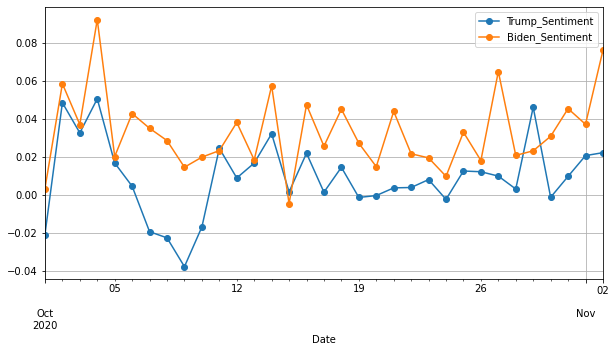

In [48]:
mean_sent.plot(x='Date', y=['Trump_Sentiment', 'Biden_Sentiment'], style="o-",
               figsize=(10,5), grid=True)
plt.savefig('trump_biden_sentiment.png')

### Wordclouds

In [15]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])

In [23]:
trump = pd.read_csv('trump_20_with_sentiment_score.csv', index_col =0)

In [24]:
start_date = '2020-10-05'
end_date = '2020-10-09'
# Select DataFrame rows between two dates
date_int = (trump['Date'] >= start_date) & (trump['Date'] <= end_date)
t = trump.loc[date_int]
t

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

,Username,Date,Content,Language,Compound_Sentiment
8,0BayBay0,2020-10-05,Now that trump have the viruses there’s will b...,en,0.000000
17,1027pink,2020-10-06,@iowajustin @GwenieB66 @Sue_119 @DrEricDing An...,en,-0.099675
74,1_onlyThanai,2020-10-08,@ShenEgg @quietplurality @barca2400 @FrankAmar...,en,-0.274750
96,2006Cairns,2020-10-06,@mrshaleysmith @proxcee @Galitsadi I’m wearing...,en,0.220200
102,21_anfernee,2020-10-08,So who trump owe $400 mil?,en,0.000000
...,...,...,...,...,...
23905,zebub_b_l,2020-10-06,@Homeoffree61 They used to hide it.\n\nI have ...,en,-0.112300
23906,zebub_b_l,2020-10-07,@thematthill @BabeTruth2 @JoeBiden I don't lis...,en,-0.009550
23907,zebub_b_l,2020-10-08,@Dcoronata It needs to be immune from what Tru...,en,0.153100
23908,zebub_b_l,2020-10-09,@AmandaStandish6 Online I never skip them to m...,en,0.095400


In [25]:
trump_neg = t[t['Compound_Sentiment'] < 0] # Select tweets about Trump with negative sentiment to investigate further

In [26]:
# Remove some keywords not giving much information
trump_neg['Content'] = trump_neg['Content'].apply(lambda x: re.sub('http[s]?://\S+', '', str(x)))
trump_neg['Content'] = trump_neg['Content'].apply(lambda x: x.replace('Trump', ''))
trump_neg['Content'] = trump_neg['Content'].apply(lambda x: x.replace('realDonald', ''))

/var/folders/gv/sd0811cx6x99ygxxh5_20kvr0000gn/T/ipykernel_28937/3320455863.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trump_neg['Content'] = trump_neg['Content'].apply(lambda x: re.sub('http[s]?://\S+', '', str(x)))
/var/folders/gv/sd0811cx6x99ygxxh5_20kvr0000gn/T/ipykernel_28937/3320455863.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trump_neg['Content'] = trump_neg['Content'].apply(lambda x: x.replace('Trump', ''))
/var/folders/gv/sd0811cx6x99ygxxh5_20kvr0000gn/T/ipykernel_28937/332045586

In [27]:
trump_neg['Content'] = trump_neg['Content'].apply(lambda x: x.replace('Biden', ''))
trump_neg['Content'] = trump_neg['Content'].apply(lambda x: x.replace('President', ''))
trump_neg['Content'] = trump_neg['Content'].apply(lambda x: x.replace('trump', ''))
trump_neg['Content'] = trump_neg['Content'].apply(lambda x: x.replace('people', ''))
trump_neg['Content'] = trump_neg['Content'].apply(lambda x: x.replace('amp', ''))
trump_neg['Content'] = trump_neg['Content'].apply(lambda x: x.replace('will', ''))

/var/folders/gv/sd0811cx6x99ygxxh5_20kvr0000gn/T/ipykernel_28937/4159653351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trump_neg['Content'] = trump_neg['Content'].apply(lambda x: x.replace('Biden', ''))
/var/folders/gv/sd0811cx6x99ygxxh5_20kvr0000gn/T/ipykernel_28937/4159653351.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trump_neg['Content'] = trump_neg['Content'].apply(lambda x: x.replace('President', ''))
/var/folders/gv/sd0811cx6x99ygxxh5_20kvr0000gn/T/ipykernel_28937/4159653351.py:3: Se

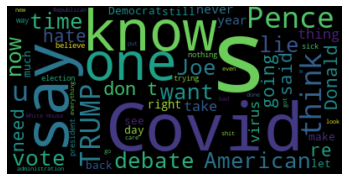

In [28]:
# Trump 2020
trump20neg = " ".join(tweet for tweet in trump_neg.Content)
wordcloud = WordCloud(stopwords=stopwords,max_words=60).generate(trump20neg)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.savefig('trump20.png')
plt.show()